# 豆瓣Top250短评可视化——词云

In [1]:
import re
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba.posseg as pseg
import pandas as pd

读取停用词表文件中的停用词表

In [2]:
# 读取停用词表
stopwords = []
with open('stopwords.txt', 'r', encoding='utf-8') as f:
    for stopword in f.readlines():
        stopwords.append(stopword[:-1]) # 去掉换行符
stopwords[0] = stopwords[0][-1] # 去除第一个字符中的无用字符
stopwords = stopwords + ['一个', '这部', '一部', '片子', '这是', '还有', '应该']

读取短评数据，并将所有评论合成一个字符串

In [3]:
# 读取文件短评内容
with open('clean_data.csv', 'r') as f:
    comment_data = f.read()
comment_data = comment_data.split('\n') # 以换行符分割短评

# 将所有短评内容组合成一个字符串
comments = ''
for item in comment_data:
    s = re.search(r'(\w+,)(https://www.douban.com/people/.+/,)(.*,)(\d,)(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},)(.+)(,\d+)', item)
    if s:
        comments += s.group(6) # 连接短评

## 总词词云

### 未去掉停用词的词云

In [4]:
# 对短评进行分词
words = ' '.join(jieba.cut(comments))

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.194 seconds.
Prefix dict has been built succesfully.


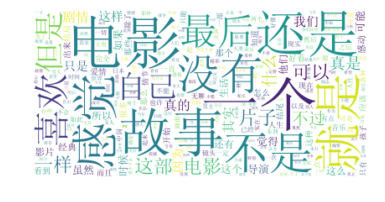

In [5]:
# 创建词云对象
wc = WordCloud(font_path='simsun.ttf', background_color='white', max_words=2000)
wc.generate(words) # 从分词后的短评内容中建词云
# 绘制并显示词云
plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### 去掉停用词后总词的词云

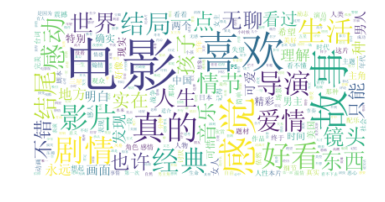

In [6]:
wc = WordCloud(font_path='simsun.ttf', background_color='white', max_words=2000, stopwords=stopwords)
wc.generate(words)
plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## 分词性词云

In [7]:
# 使用词性标注分词器进行分词
flag_words = pseg.cut(comments)

In [8]:
flags = []
words = []
for word, flag in flag_words:
    flags.append(flag) # 词性
    words.append(word) # 词语

In [9]:
fw = pd.DataFrame({'word':words,
                  'flag':flags})

### 名词词云

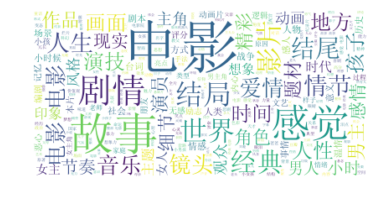

In [10]:
n_words = ' '.join(fw.loc[fw['flag'] == 'n', 'word']) 
# 创建词云对象
n_wc = WordCloud(font_path='simsun.ttf', 
                 background_color='white', 
                 max_words=2000,
                 stopwords=stopwords)
n_wc.generate(n_words) # 从分词后的短评内容中建词云
# 绘制并显示词云
plt.figure()
plt.imshow(n_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### 形容词词云

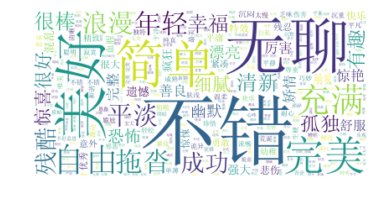

In [11]:
adj_words = ' '.join(fw.loc[fw['flag'] == 'a', 'word']) 
# 创建词云对象
adj_wc = WordCloud(font_path='simsun.ttf', 
                   background_color='white', 
                   max_words=2000,
                   stopwords=stopwords)
adj_wc.generate(adj_words) # 从分词后的短评内容中建词云
# 绘制并显示词云
plt.figure()
plt.imshow(adj_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### 动词词云

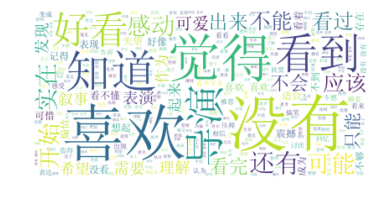

In [12]:
v_words = ' '.join(fw.loc[fw['flag'] == 'v', 'word']) 
# 创建词云对象
v_wc = WordCloud(font_path='simsun.ttf', background_color='white', max_words=2000)
v_wc.generate(v_words) # 从分词后的短评内容中建词云
# 绘制并显示词云
plt.figure()
plt.imshow(v_wc, interpolation='bilinear')
plt.axis("off")
plt.show()